<a href="https://colab.research.google.com/github/lohi-cell/Waste-Classification/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Management Using CNN Model**


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 21.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


# Installing Libraries

In [2]:
pip install opencv-python


In [3]:
pip install tensorflow


In [49]:
pip install numpy pandas matplotlib tqdm


## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Train and test

In [6]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing. image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# Visualization

In [52]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})


100%|██████████| 9999/9999 [00:04<00:00, 2021.27it/s]


In [9]:
data.shape

(22564, 2)

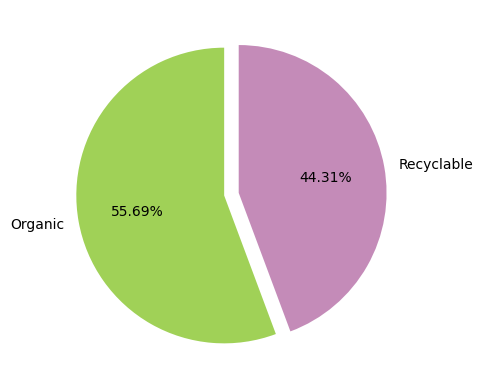

In [10]:
colors = ["#a0d157", "#c48bb8"]
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional
plt.show()

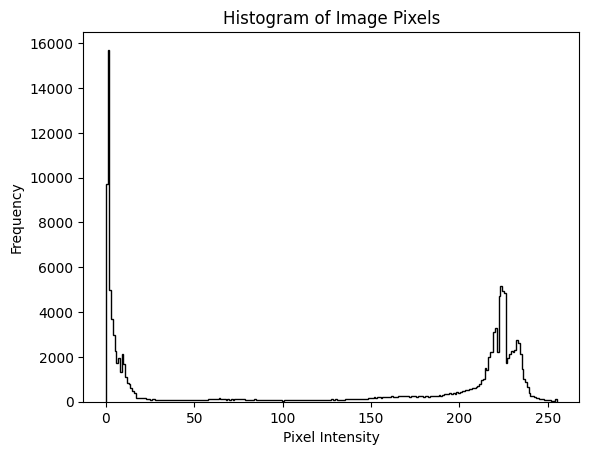

In [11]:
def plot_image_histogram(image_path):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.hist(img.ravel(), bins=256, histtype='step', color='black')
    plt.title("Histogram of Image Pixels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Example
image_path = "path_to_image.jpg"
plot_image_histogram(image_path)


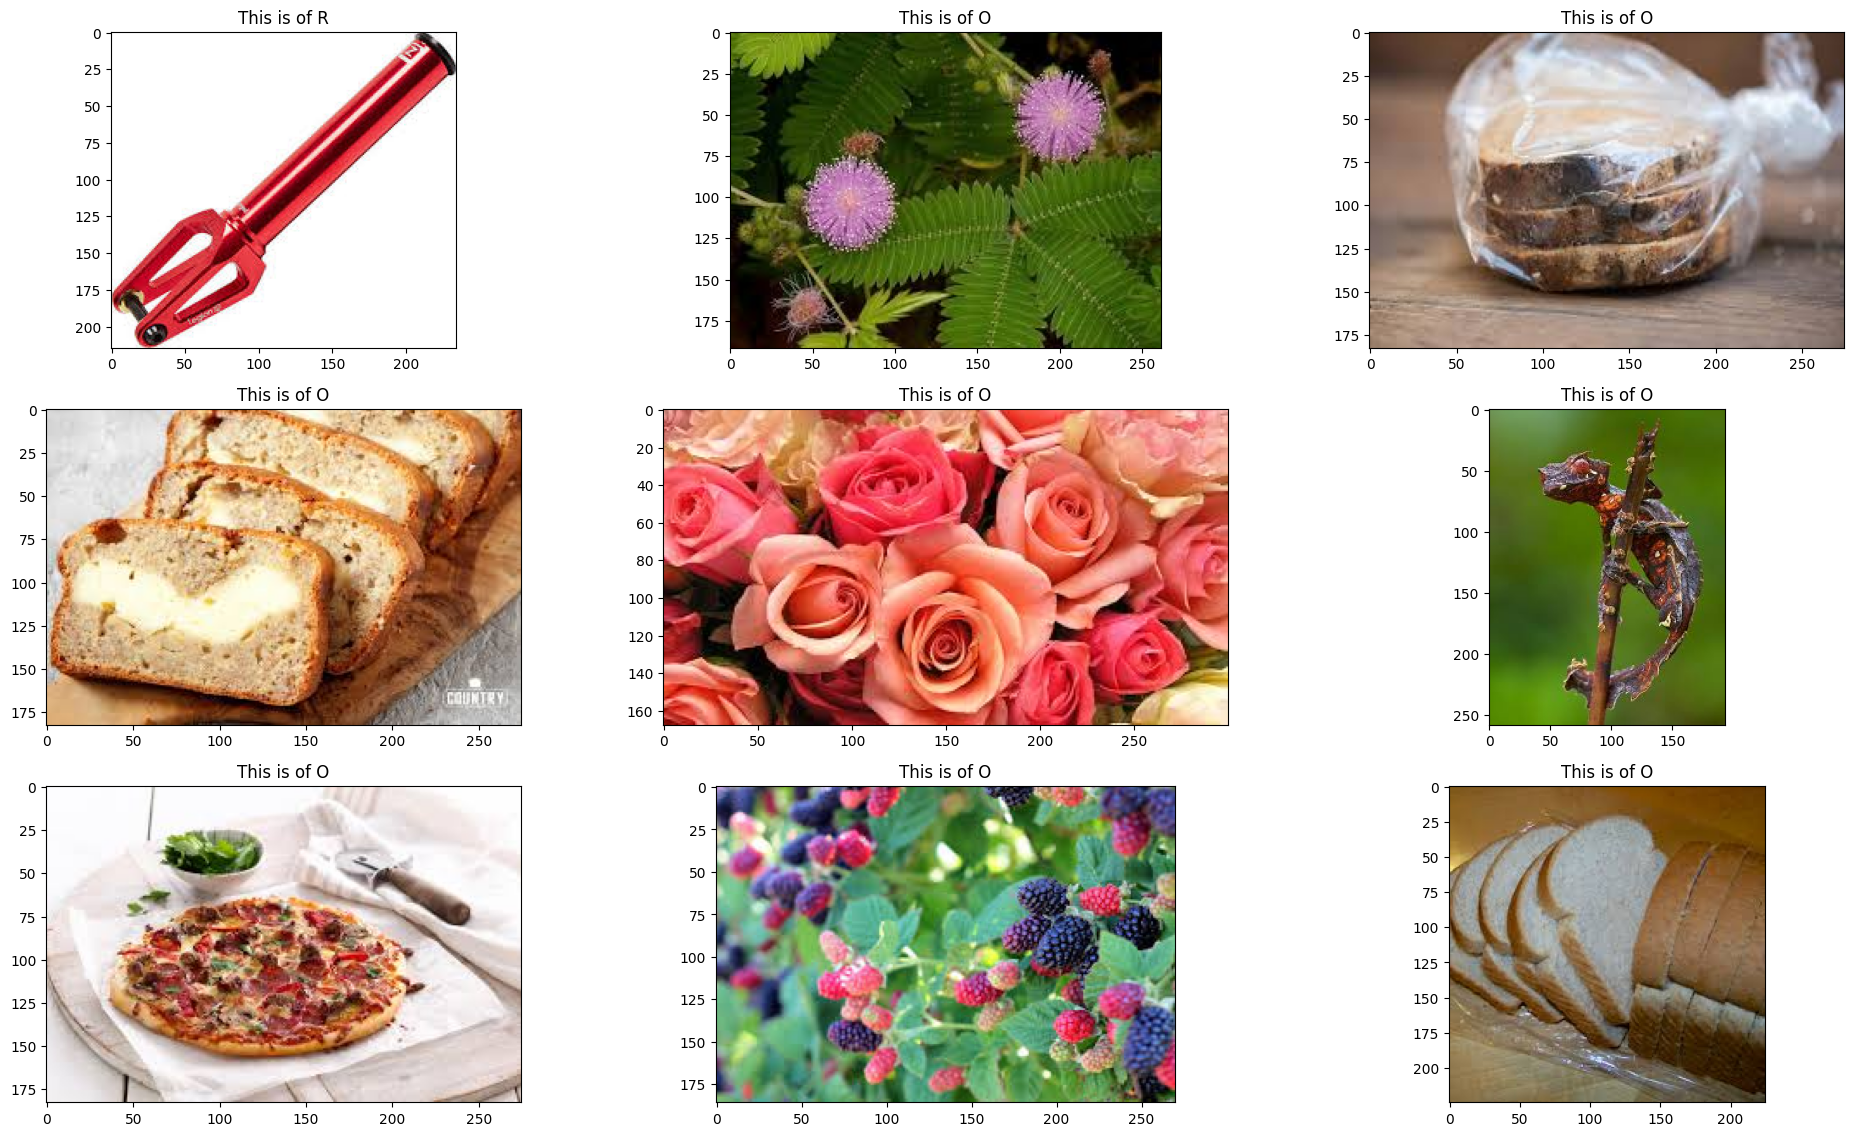

In [12]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

# CNN-Convolutional Neural Network

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size= 64

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [16]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(train_path,target_size= (224,224), batch_size= batch_size,color_mode= "rgb",class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [18]:
hist = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 109s 278ms/step - accuracy: 0.7539 - loss: 0.5588 - val_accuracy: 0.8391 - val_loss: 0.3837
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 86s 244ms/step - accuracy: 0.8359 - loss: 0.3971 - val_accuracy: 0.8569 - val_loss: 0.3420
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 80s 225ms/step - accuracy: 0.8538 - loss: 0.3609 - val_accuracy: 0.8744 - val_loss: 0.3094
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - accuracy: 0.8689 - loss: 0.3277 - val_accuracy: 0.8819 - val_loss: 0.2784
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 87s 246ms/step - accuracy: 0.8825 - loss: 0.2972 - val_accuracy: 0.9040 - val_loss: 0.2272
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 87s 247ms/step - accuracy: 0.9038 - loss: 0.2477 - val_accuracy: 0.9345 - val_loss: 0.1749
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 142s 248ms/step - accuracy: 0.9210 - loss: 0.2003 - val_accuracy: 0.9317 - val_loss: 0.1949
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 87s 246ms/step - accuracy: 0.9370 - loss:

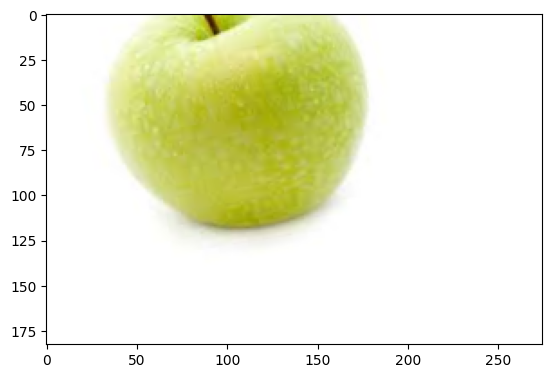

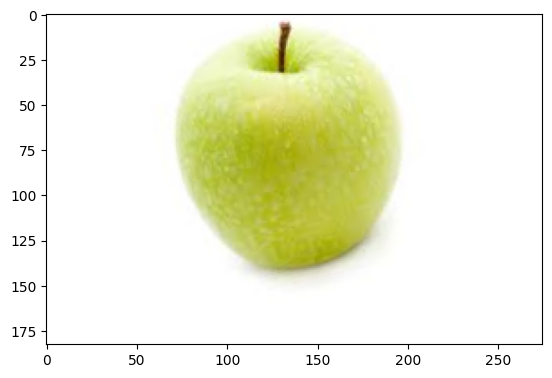

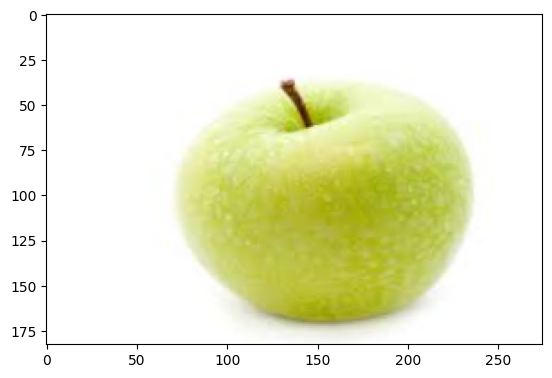

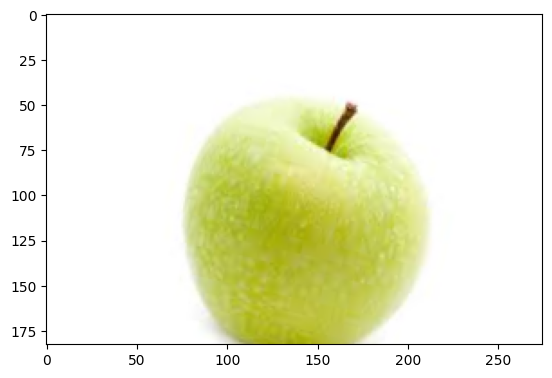

In [34]:
img = load_img('/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN/O/O_2.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:
       break
    plt.show()

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

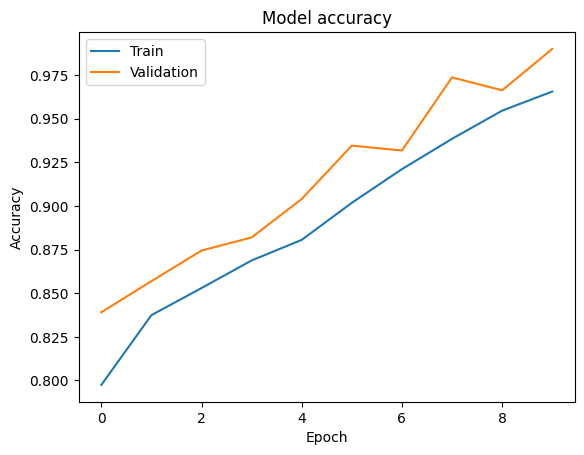

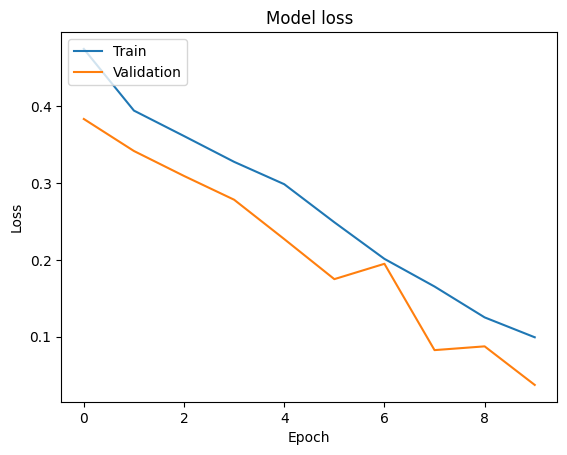

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

353/353 ━━━━━━━━━━━━━━━━━━━━ 46s 129ms/step


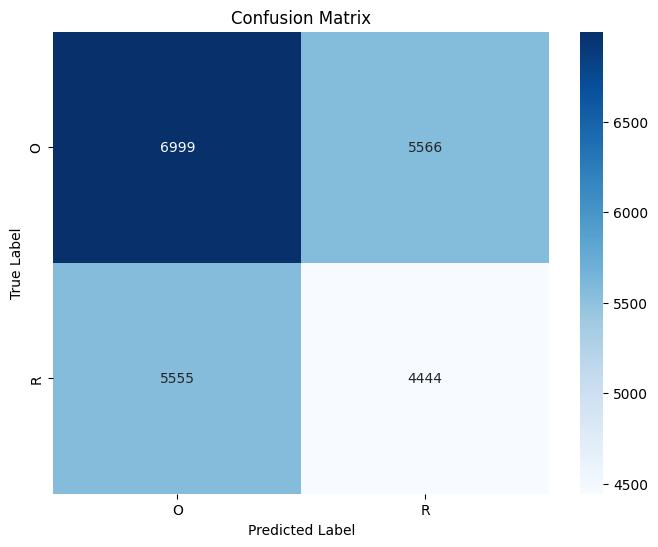

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # Fixed indentation

# Assuming you have your test data in test_generator
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes  # Get true labels from the generator

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
# Assuming 'hist' is the history object returned by model.fit
best_accuracy = max(hist.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_accuracy}")

loss, accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Best Validation Accuracy: 0.9899397492408752
Test Loss: 0.022001739591360092
Test Accuracy: 0.9941056370735168
